Linear  Regression

Adapt the datas 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv("Start-Up_final.csv")

In [3]:
df.drop(columns="Unnamed: 0", inplace = True)

df_final = df

In [4]:
# Instanciation de l'encodeur
encoder = LabelEncoder()  # sparse=False pour obtenir un DataFrame dense

# Encodage
encoded_array = encoder.fit_transform(df[['status']].values.ravel())

# Transformation en DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=["status"])

# Fusionner avec le DataFrame initial et supprimer l'ancienne colonne
df_final = pd.concat([df.drop(columns=['status']), encoded_df], axis=1)


In [5]:
df_final

,category_list,funding_total_usd,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,status
0,Media,10000000,IND,1,NaN,2015-01-05,2015-01-05,3
1,Social Network Media,700000,USA,2,2014-09-04,2014-03-01,2014-10-14,3
2,Mobile,3406878,NaN,1,NaN,2014-01-30,2014-01-30,3
3,Curated Web,2000000,CHN,1,2007-01-01,2008-03-19,2008-03-19,3
4,Software,-,USA,1,2010-01-01,2014-07-24,2014-07-24,3
...,...,...,...,...,...,...,...,...
66363,Enterprise Software,1587301,CHN,1,NaN,2012-04-01,2012-04-01,3
66364,Mobile,114304,HRV,4,2012-05-13,2011-11-01,2014-03-01,3
66365,unknown,-,NaN,1,2011-01-01,2014-08-01,2014-08-01,3
66366,Telecommunications,18192,USA,1,2014-01-01,2015-01-01,2015-01-01,3


Date

In [6]:
print(df_final["founded_at"].value_counts().head(1))
print(df_final["first_funding_at"].value_counts().head(1))
print(df_final["last_funding_at"].value_counts().head(1))

founded_at
2012-01-01    2730
Name: count, dtype: int64
first_funding_at
2014-01-01    565
Name: count, dtype: int64
last_funding_at
2014-01-01    483
Name: count, dtype: int64


In [7]:
df_final["last_funding_at"] = pd.to_datetime(df_final["last_funding_at"], format ="%Y-%m-%d" , errors ="coerce")

df_final["last_funding_at"] = df_final["last_funding_at"].dt.year.astype("Int64")

df_final["first_funding_at"] = pd.to_datetime(df_final["first_funding_at"], format ="%Y-%m-%d", errors = "coerce")

df_final["first_funding_at"] = df_final["first_funding_at"].dt.year.astype("Int64")

df_final["founded_at"] = pd.to_datetime(df_final["founded_at"], format ="%Y-%m-%d", errors = "coerce")

df_final["founded_at"] = df_final["founded_at"].dt.year.astype("Int64")

df_final["last_funding_at"] = df_final["last_funding_at"].fillna(2015).astype("Int64")
df_final["first_funding_at"] = df_final["first_funding_at"].fillna(2014).astype("Int64")
df_final["founded_at"] = df_final["founded_at"].fillna(2012).astype("Int64")

Countries

We merge together the countries that had extremly small start-up (10 or less) in order to reduce noise and the possibility of overfitting

In [8]:
threshold = 10  # Seuil pour définir un pays rare
country_counts = df['country_code'].value_counts()

df_final['country_code'] = df_final['country_code'].apply(lambda x: x if country_counts.get(x, 0) > threshold else 'Other')


In [9]:
label_encoder = LabelEncoder()

df_final["country_code"] = label_encoder.fit_transform(df_final["country_code"])


Category_list

In [10]:
df_final["category_list"] = label_encoder.fit_transform(df_final["category_list"])

In [11]:
df_final

,category_list,funding_total_usd,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,status
0,32,10000000,30,1,2012,2015,2015,3
1,55,700000,68,2,2014,2014,2014,3
2,36,3406878,49,1,2012,2014,2014,3
3,12,2000000,11,1,2007,2008,2008,3
4,56,-,68,1,2010,2014,2014,3
...,...,...,...,...,...,...,...,...
66363,18,1587301,11,1,2012,2012,2012,3
66364,36,114304,49,4,2012,2011,2014,3
66365,65,-,49,1,2011,2014,2014,3
66366,60,18192,68,1,2014,2015,2015,3


In [12]:
df_final["funding_total_usd"] = pd.to_numeric(df_final["funding_total_usd"], errors="coerce")

df_final.dropna(subset=['funding_total_usd'], inplace=True)



Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



X = df_final.drop(columns=["status"])  # Features
y = df_final["status"]  # Cible

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit + transform sur train
X_test_scaled = scaler.transform(X_test)  # Seulement transform sur test (sans refit)

# 🔹 Correction : Rétablir le DataFrame avec les bons index
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# Création du modèle et entraînement
model = LogisticRegression(solver="lbfgs", max_iter=10000)
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)




In [14]:

# Calcul des métriques
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Racine carrée du MSE

print(f"R² Score : {r2:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")

R² Score : -0.21
MSE : 1.17
RMSE : 1.08


Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




df = pd.read_csv("final_Start-Up.csv")

df["last_funding_at"] = pd.to_datetime(df["last_funding_at"], format ="%Y-%m-%d" , errors ="coerce")

df["last_funding_at"] = df["last_funding_at"].dt.year.astype("Int64")

df["first_funding_at"] = pd.to_datetime(df["first_funding_at"], format ="%Y-%m-%d", errors = "coerce")

df["first_funding_at"] = df["first_funding_at"].dt.year.astype("Int64")

df["founded_at"] = pd.to_datetime(df["founded_at"], format ="%Y-%m-%d", errors = "coerce")

df["founded_at"] = df["founded_at"].dt.year.astype("Int64")

df["last_funding_at"] = df["last_funding_at"].fillna(2015).astype("Int64")
df["first_funding_at"] = df["first_funding_at"].fillna(2014).astype("Int64")
df["founded_at"] = df["founded_at"].fillna(2012).astype("Int64")





In [20]:
X = df_final.drop(columns="status")
y = df_final["status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100,class_weight="balanced" ,random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


✅ Accuracy : 0.78

📊 Classification Report :
               precision    recall  f1-score   support

           0       0.40      0.25      0.31       941
           1       0.37      0.15      0.21      1015
           2       0.41      0.08      0.13       302
           3       0.82      0.94      0.88      8459

    accuracy                           0.78     10717
   macro avg       0.50      0.36      0.38     10717
weighted avg       0.73      0.78      0.74     10717



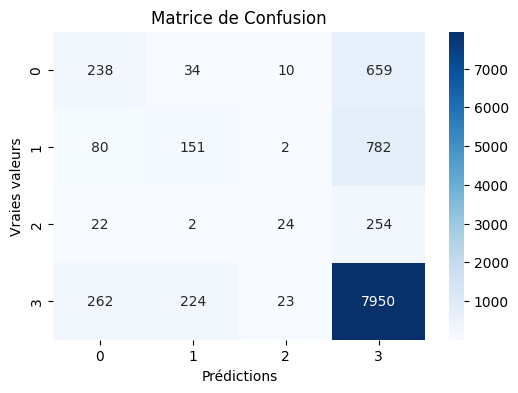

In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy : {accuracy:.2f}")

# Rapport détaillé (Precision, Recall, F1-score)
print("\n📊 Classification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")
plt.show()


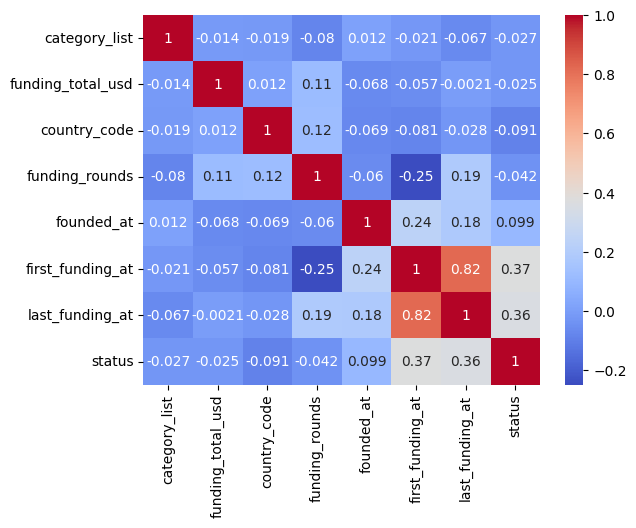

In [22]:
import seaborn as sns

corr = df_final.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
